In [ ]:
import torch
import matplotlib.pyplot as plt
from torch import nn

In [ ]:
torch.arange(0,30).view(6,5)

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]])

In [ ]:
x = torch.linspace(-5,5,1000).view(-1,1)

$y = 20sin(5x) + 6x^2 + tanh(x)$

In [ ]:
y = 20 * torch.sin(5 * x) + 6 * x**2 + torch.tanh(x)

In [ ]:
x.shape

torch.Size([1000, 1])

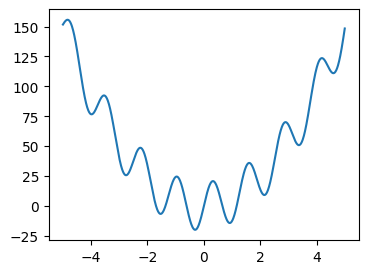

In [ ]:
plt.figure(figsize=(4,3))
plt.plot(x,y)

In [ ]:
class MyNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(in_features=1 , out_features=20)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(in_features=20 , out_features=20)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(in_features=20 , out_features=1)
  def forward(self, input):
    y = self.fc1(input)
    y = self.relu1(y)
    y = self.fc2(y)
    y = self.relu2(y)
    y = self.fc3(y)
    return y

In [ ]:
mymodel = MyNN()

In [ ]:
epochs = 15000
criterion = nn.MSELoss()
opt = torch.optim.Adam(mymodel.parameters())

In [ ]:
losses = []
for epoch in range(epochs):
  output = mymodel.forward(x)
  opt.zero_grad()
  loss = criterion(y, output)
  loss.backward()
  opt.step()
  losses.append(loss.item())
  if epoch % 1000 == 0:
    print(f'Epoch {epoch}, loss : ', loss.item())

Epoch 0, loss :  4700.66650390625
Epoch 1000, loss :  359.8387756347656
Epoch 2000, loss :  238.13546752929688
Epoch 3000, loss :  215.5143280029297
Epoch 4000, loss :  198.04757690429688
Epoch 5000, loss :  174.5831756591797
Epoch 6000, loss :  159.47271728515625
Epoch 7000, loss :  142.6320343017578
Epoch 8000, loss :  136.00506591796875
Epoch 9000, loss :  134.35899353027344
Epoch 10000, loss :  133.98611450195312
Epoch 11000, loss :  133.87367248535156
Epoch 12000, loss :  133.82955932617188
Epoch 13000, loss :  133.80979919433594
Epoch 14000, loss :  133.80015563964844


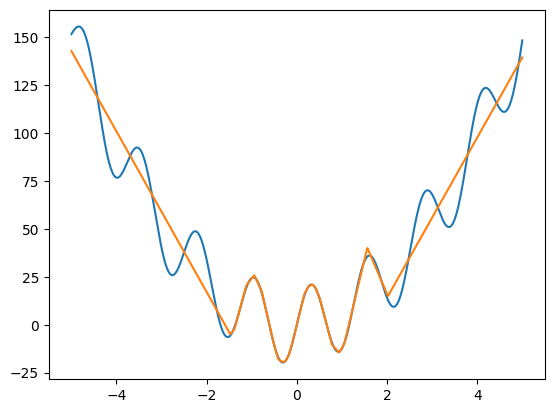

In [ ]:
plt.plot(x,y, x,output.detach())

In [ ]:
class MyNN2(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(in_features=1 , out_features=20)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(in_features=20 , out_features=20)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(in_features=20 , out_features=1)
  def forward(self, input):
    y = self.fc1(input)
    y = torch.sin(y)
    y = self.fc2(y)
    y = torch.sin(y)
    y = self.fc3(y)
    return y

In [ ]:
mymodel = MyNN2()

In [ ]:
epochs = 15000
criterion = nn.MSELoss()
opt = torch.optim.Adam(mymodel.parameters())

In [ ]:
losses = []
for epoch in range(epochs):
  output = mymodel.forward(x)
  opt.zero_grad()
  loss = criterion(y, output)
  loss.backward()
  opt.step()
  losses.append(loss.item())
  if epoch % 1000 == 0:
    print(f'Epoch {epoch}, loss : ', loss.item())

Epoch 0, loss :  4721.81396484375
Epoch 1000, loss :  2780.660888671875
Epoch 2000, loss :  1753.825439453125
Epoch 3000, loss :  1071.554443359375
Epoch 4000, loss :  654.0697631835938
Epoch 5000, loss :  387.09844970703125
Epoch 6000, loss :  216.4731903076172
Epoch 7000, loss :  112.99189758300781
Epoch 8000, loss :  59.5799446105957
Epoch 9000, loss :  29.445554733276367
Epoch 10000, loss :  12.265815734863281
Epoch 11000, loss :  4.133877754211426
Epoch 12000, loss :  1.045728325843811
Epoch 13000, loss :  0.20716987550258636
Epoch 14000, loss :  0.0652301087975502


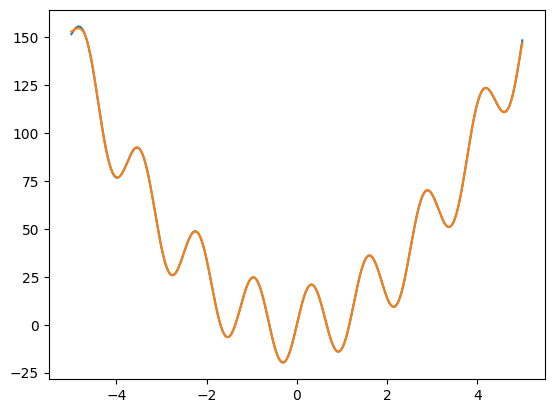

In [ ]:
plt.plot(x,y, x,output.detach())

## Part 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
from time import time

In [ ]:
mytransforms = transforms.Compose([
                                   transforms.ToTensor(),
                                   transforms.Normalize(0.5,0.5)
])

In [ ]:
train_data = MNIST('./data', download = True, train = True, transform=mytransforms)
test_data  = MNIST('./data', download = False, train = False, transform=mytransforms)

In [ ]:
train_loader = DataLoader(train_data, batch_size = 64, num_workers = 2)
test_loader = DataLoader(test_data, batch_size = 64, num_workers = 2)

In [ ]:
class MNIST_Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 16, kernel_size = 3)
    self.relu1 = nn.ReLU()
    self.conv2 = nn.Conv2d(16 , 16 , kernel_size = 3)
    self.relu2 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
    self.flatten= nn.Flatten()
    self.fc1 = nn.Linear(in_features = 12*12*16 , out_features= 10)

  def forward(self, input):
    y = self.conv1(input)
    y = self.relu1(y)
    y = self.conv2(y)
    y = self.relu2(y)
    y = self.pool1(y)
    y = self.flatten(y)
    y = self.fc1(y)
    return y

In [ ]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')
mymodel = MNIST_Classifier().to(device)

In [ ]:
epochs = 10
criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam(mymodel.parameters())
losses = [] # Train Losses in different epochs
val_losses = []# Val Losses in different epochs
train_accuracy = []
val_accuracy = []

for epoch in range(epochs):
  tic = time() # Start of epoch
  # Train
  mymodel = mymodel.train()
  batch_losses = []
  epoch_corrects = 0 # train corrects
  for batch in train_loader:
    input = batch[0].to(device) # Images
    target = batch[1].to(device) # Labels
    output = mymodel.forward(input)
    opt.zero_grad()
    loss = criterion(output, target)
    loss.backward()
    opt.step()
    batch_losses.append(loss.item())
    batch_corrects = sum(target == output.argmax(dim = 1))
    epoch_corrects += batch_corrects
  epoch_loss = np.mean(batch_losses)
  losses.append(epoch_loss)
  epoch_accuracy = epoch_corrects / len(train_data)
  train_accuracy.append(epoch_accuracy)
  train_string = f"Epoch {epoch}, loss : {epoch_loss: 0.5f}, accuracy : {epoch_accuracy: 0.5f}, "

  mymodel = mymodel.eval() ### To disable dropout
  # Validation
  batch_losses = []
  epoch_corrects = 0 # val corrects
  for batch in test_loader:
    input = batch[0].to(device) # Images
    target = batch[1].to(device) # Labels
    output = mymodel.forward(input)
    with torch.no_grad():
      loss = criterion(output, target)
      batch_losses.append(loss.item())
      batch_corrects = sum(target == output.argmax(dim = 1))
      epoch_corrects += batch_corrects
  epoch_loss = np.mean(batch_losses)
  val_losses.append(epoch_loss)
  epoch_accuracy = epoch_corrects / len(test_data)
  val_accuracy.append(epoch_accuracy)
  toc = time() #End of epoch
  val_string = f" val_loss : {epoch_loss: 0.5f}, val_accuracy : {epoch_accuracy: 0.5f}, time : {toc - tic: 0.1f}"
  print(train_string + val_string)


Epoch 0, loss :  0.20521, accuracy :  0.94075,  val_loss :  0.08464, val_accuracy :  0.97220, time :  50.4
Epoch 1, loss :  0.06641, accuracy :  0.98038,  val_loss :  0.05566, val_accuracy :  0.98330, time :  43.5
Epoch 2, loss :  0.04805, accuracy :  0.98555,  val_loss :  0.04890, val_accuracy :  0.98410, time :  44.3
Epoch 3, loss :  0.03844, accuracy :  0.98843,  val_loss :  0.04604, val_accuracy :  0.98590, time :  43.3
Epoch 4, loss :  0.03110, accuracy :  0.99085,  val_loss :  0.04764, val_accuracy :  0.98500, time :  45.7
Epoch 5, loss :  0.02489, accuracy :  0.99328,  val_loss :  0.04957, val_accuracy :  0.98500, time :  43.7
Epoch 6, loss :  0.01980, accuracy :  0.99473,  val_loss :  0.05113, val_accuracy :  0.98550, time :  45.0
Epoch 7, loss :  0.01604, accuracy :  0.99557,  val_loss :  0.06204, val_accuracy :  0.98500, time :  43.7
Epoch 8, loss :  0.01363, accuracy :  0.99592,  val_loss :  0.06458, val_accuracy :  0.98330, time :  42.7
Epoch 9, loss :  0.01120, accuracy : 

In [ ]:
epoch_corrects = 0
for batch in test_loader:
    input = batch[0].to(device) # Images
    target = batch[1].to(device) # Labels

    output = mymodel.forward(input)
    with torch.no_grad():
      loss = criterion(output, target)
      batch_losses.append(loss.item())
      batch_corrects = sum(target == output.argmax(dim = 1))
      # print(batch_corrects)
      epoch_corrects += batch_corrects
epoch_loss = np.mean(batch_losses)
# val_losses.append(epoch_loss)
epoch_accuracy = epoch_corrects / len(test_loader)
# val_accuracy.append(epoch_accuracy)
toc = time() #End of epoch
val_string = f" val_loss : {epoch_loss: 0.5f}, val_accuracy : {epoch_accuracy: 0.5f}, time : {toc - tic: 0.1f}"
print(val_string)

 val_loss :  0.07676, val_accuracy :  62.59872, time :  48.3


In [ ]:
epoch_accuracy

tensor(62.5987)